<a href="https://colab.research.google.com/github/makaronaaa/DataSciencePython/blob/main/KNN_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sb
df=pd.read_csv('/content/sample_data/GOLD_weekly_return_volatility_labeled.csv')
df

,Year,Week_Number,mean_return,volatility,label
0,2020,1,-0.77360,1.874892,red
1,2020,2,0.12240,1.644458,green
2,2020,3,1.04625,1.093152,green
3,2020,4,-0.18800,1.981426,red
4,2020,5,-0.35180,1.341252,red
...,...,...,...,...,...
99,2021,48,-0.98360,1.341614,red
100,2021,49,-0.28920,1.481579,red
101,2021,50,0.50560,2.269345,green
102,2021,51,0.24450,0.447162,green


Implement k-NN classifier For each week, your feature set is
(μ, σ) for that week. Use your labels (you will have 52 labels
per year for each week) from year 1 to train your classifier and
predict labels for year 2.

take k = 3, 5, 7, 9, 11. For each value of k compute the
accuracy of your k-NN classifier on year 1 data. On x axis
you plot k and on y-axis you plot accuracy. What is the
optimal value of k for year 1?

In [15]:
K_values=[3, 5, 7, 9, 11]
accuracy=[]

#accuracy mean of equal
for k in K_values:
  X = df[["mean_return","volatility"]][df["Year"]==2020].values
  Y = df[["label"]][df["Year"]==2020].values
  X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5)
  
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  knn_classifier = KNeighborsClassifier(n_neighbors=k)
  knn_classifier.fit(X_train ,Y_train)
  prediction = knn_classifier.predict(X_test)
  cm = confusion_matrix(Y_test, prediction)
  accur=(cm[0][0] + cm[1][1]) / (cm[0][0] + cm[1][1] + cm[1][0] + cm[0][1])
  accuracy.append(accur) #append all values in the list for plotting
accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[0.6153846153846154,
 0.5384615384615384,
 0.6538461538461539,
 0.46153846153846156,
 0.6538461538461539]

use the optimal value of k from year 1 to predict labels for
year 2. What is your accuracy?

Optimum value k* of k:  7


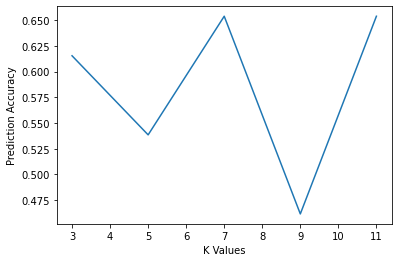

In [16]:
plt.plot(K_values, accuracy)
plt.xlabel('K Values')
plt.ylabel('Prediction Accuracy')
K_optimum = K_values[pd.Series(accuracy).idxmax()]
print("Optimum value k* of k: ", K_optimum)

using the optimal value for k from year 1, compute the
confusion matrix for year 2

In [37]:
df2 = df[df["Year"]==2021].reset_index(drop=True)
X = df2[["mean_return","volatility"]]
Y = df2[["label"]]
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

knn_classifier = KNeighborsClassifier(n_neighbors= K_optimum)
knn_classifier.fit(X,Y)
prediction = knn_classifier.predict(X)
df2['predicted']= prediction

cm = confusion_matrix(Y, prediction)
accur=(cm[0][0] + cm[1][1]) / (cm[0][0] + cm[1][1] + cm[1][0] + cm[0][1])
accuracy.append(accur) #append all values in the list for plotting
accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[0.6153846153846154,
 0.5384615384615384,
 0.6538461538461539,
 0.46153846153846156,
 0.6538461538461539,
 0.9615384615384616]

using the optimal value for k from year 1, compute the
confusion matrix for year 2.
what is true positive rate (sensitivity or recall) and true
negative rate (specificity) for year 2?

In [41]:
X = df[["mean_return","volatility"]][df["Year"]==2020].values
Y = df[["label"]][df["Year"]==2020].values

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

knn_classifier = KNeighborsClassifier(n_neighbors= K_optimum)
knn_classifier.fit(X,Y)
prediction = knn_classifier.predict(X)

cf = confusion_matrix(Y , prediction)
print("confusion matrix: considering green is + \n",  cf)   
tp = cf[0][0]
fn = cf[0][1]
fp = cf[1][0]
tn = cf[1][1]
print("TP=", tp,"    FP=",  fp,"    FN=",  fn,"   TN=",  tn)

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
acc = (tp + tn) / (tp + tn + fp + fn)
print("TPR=", tpr, "    TNR=", tnr, "    ACC=", acc)

confusion matrix: considering green is + 
 [[22  6]
 [ 7 17]]
TP= 22     FP= 7     FN= 6    TN= 17
TPR= 0.7857142857142857     TNR= 0.7083333333333334     ACC= 0.75


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


implement a trading strategy based on your labels for year
2 and compare the performance with the ”buy-and-hold”
strategy. Which strategy results in a larger amount at the
end of the year?

In [46]:
#label trading
value = 100
for i in range(len(df2)):
    if df2['predicted'][i] == 'green':
        value = value*(100 + df2['mean_return'][i])/100
        
print("Final value after trading by predicted labels- y2: ", value)    
print("annual return = ", round((value-100), 2), '%')

#buy-hold
## BUY AND HOLD STRATEGY
value = 100
for i in range(len(df2)):
    value = value*(100 + df2['mean_return'][i])/100
        
print("Final value for y2: ", value)    
print("annual return = ", round((value-100), 2), '%')

Final value after trading by predicted labels- y2:  118.65379023253057
annual return =  18.65 %
Final value for y2:  96.84881395166886
annual return =  -3.15 %
